In [6]:
import sys
sys.path.append("../")

import subprocess
import datetime
from joblib import Parallel, delayed

import json
import os

import matplotlib.pyplot as plt
from tqdm import tqdm
import optuna

from run import *

In [7]:
start_case = 0
case_num = 1000

cases = [
    (f"tools/in/{seed:04}.txt", f"tools/out/{seed:04}.txt")
    for seed in range(start_case, start_case + case_num)
]

subprocess.run("cargo build --features local --release --manifest-path=../Cargo.toml", shell=True)

for k in range(1, 10):
    args = " ".join(map(str, [k, k, 1]))
    solver_path = "./target/release/ahc030"
    solver_cmd = f"./tools/target/release/tester {solver_path} {args}"
    solver_version = f"for-tune-k-{args}"
    runner = Runner(
        Input,
        Result,
        solver_cmd=solver_cmd,
        solver_version=solver_version,
        database_csv="../log/database.csv",
        log_file="../log/a.log",
        verbose=0,
    )
    runner.run(cases=cases)

    Finished release [optimized] target(s) in 0.02s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   12.3s
[Par

In [19]:
df = pd.read_csv("../log/database.csv")
input_df = pd.read_csv("../log/input.csv")
df = pd.merge(df, input_df, on="input_file", how="left")
best_scores = (
    df.groupby("input_file")["score"].min().rename("best_score")
)
df = pd.merge(df, best_scores, on="input_file", how="left")
df["relative_score"] = df["best_score"] / df["score"]

In [39]:
a = df[df.solver_version.str.startswith("for-tune-k-")].reset_index()
best_m = [int(a.groupby(["m", "solver_version"]).relative_score.mean()[m].idxmax()[-3]) for m in range(2, 21)]
for m in range(2, 21):
    display(a.groupby(["m", "solver_version"]).relative_score.mean()[m])

solver_version
for-tune-k-1 1 1    0.259878
for-tune-k-2 2 1    0.384469
for-tune-k-3 3 1    0.457501
for-tune-k-4 4 1    0.520594
for-tune-k-5 5 1    0.510870
for-tune-k-6 6 1    0.534613
for-tune-k-7 7 1    0.515627
for-tune-k-8 8 1    0.482774
for-tune-k-9 9 1    0.395678
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.304221
for-tune-k-2 2 1    0.417561
for-tune-k-3 3 1    0.514048
for-tune-k-4 4 1    0.571575
for-tune-k-5 5 1    0.596858
for-tune-k-6 6 1    0.578577
for-tune-k-7 7 1    0.557233
for-tune-k-8 8 1    0.416912
for-tune-k-9 9 1    0.340978
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.337055
for-tune-k-2 2 1    0.478609
for-tune-k-3 3 1    0.554671
for-tune-k-4 4 1    0.626624
for-tune-k-5 5 1    0.603736
for-tune-k-6 6 1    0.590469
for-tune-k-7 7 1    0.543544
for-tune-k-8 8 1    0.420201
for-tune-k-9 9 1    0.319626
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.360599
for-tune-k-2 2 1    0.496911
for-tune-k-3 3 1    0.572477
for-tune-k-4 4 1    0.612809
for-tune-k-5 5 1    0.626887
for-tune-k-6 6 1    0.596109
for-tune-k-7 7 1    0.536644
for-tune-k-8 8 1    0.400675
for-tune-k-9 9 1    0.291702
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.356101
for-tune-k-2 2 1    0.495585
for-tune-k-3 3 1    0.590548
for-tune-k-4 4 1    0.641959
for-tune-k-5 5 1    0.675500
for-tune-k-6 6 1    0.678952
for-tune-k-7 7 1    0.577003
for-tune-k-8 8 1    0.527253
for-tune-k-9 9 1    0.371790
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.366511
for-tune-k-2 2 1    0.536038
for-tune-k-3 3 1    0.621255
for-tune-k-4 4 1    0.665710
for-tune-k-5 5 1    0.702168
for-tune-k-6 6 1    0.662255
for-tune-k-7 7 1    0.629910
for-tune-k-8 8 1    0.601500
for-tune-k-9 9 1    0.425005
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.363187
for-tune-k-2 2 1    0.500422
for-tune-k-3 3 1    0.575801
for-tune-k-4 4 1    0.589494
for-tune-k-5 5 1    0.672925
for-tune-k-6 6 1    0.651682
for-tune-k-7 7 1    0.617716
for-tune-k-8 8 1    0.568783
for-tune-k-9 9 1    0.448594
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.356592
for-tune-k-2 2 1    0.512337
for-tune-k-3 3 1    0.585408
for-tune-k-4 4 1    0.629117
for-tune-k-5 5 1    0.670748
for-tune-k-6 6 1    0.650836
for-tune-k-7 7 1    0.593503
for-tune-k-8 8 1    0.502466
for-tune-k-9 9 1    0.387753
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.362762
for-tune-k-2 2 1    0.487130
for-tune-k-3 3 1    0.584605
for-tune-k-4 4 1    0.582838
for-tune-k-5 5 1    0.633799
for-tune-k-6 6 1    0.595031
for-tune-k-7 7 1    0.647848
for-tune-k-8 8 1    0.541992
for-tune-k-9 9 1    0.401969
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.366933
for-tune-k-2 2 1    0.397820
for-tune-k-3 3 1    0.508829
for-tune-k-4 4 1    0.540623
for-tune-k-5 5 1    0.492076
for-tune-k-6 6 1    0.492519
for-tune-k-7 7 1    0.467040
for-tune-k-8 8 1    0.420418
for-tune-k-9 9 1    0.365519
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.355550
for-tune-k-2 2 1    0.433257
for-tune-k-3 3 1    0.508380
for-tune-k-4 4 1    0.531125
for-tune-k-5 5 1    0.455434
for-tune-k-6 6 1    0.569579
for-tune-k-7 7 1    0.424520
for-tune-k-8 8 1    0.416797
for-tune-k-9 9 1    0.376109
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.279786
for-tune-k-2 2 1    0.501483
for-tune-k-3 3 1    0.461859
for-tune-k-4 4 1    0.460115
for-tune-k-5 5 1    0.326175
for-tune-k-6 6 1    0.431755
for-tune-k-7 7 1    0.379665
for-tune-k-8 8 1    0.342983
for-tune-k-9 9 1    0.378483
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.326887
for-tune-k-2 2 1    0.434069
for-tune-k-3 3 1    0.457699
for-tune-k-4 4 1    0.558595
for-tune-k-5 5 1    0.512303
for-tune-k-6 6 1    0.408322
for-tune-k-7 7 1    0.431965
for-tune-k-8 8 1    0.340136
for-tune-k-9 9 1    0.278208
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.379789
for-tune-k-2 2 1    0.526799
for-tune-k-3 3 1    0.464857
for-tune-k-4 4 1    0.509130
for-tune-k-5 5 1    0.433196
for-tune-k-6 6 1    0.568449
for-tune-k-7 7 1    0.356008
for-tune-k-8 8 1    0.254709
for-tune-k-9 9 1    0.314629
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.294739
for-tune-k-2 2 1    0.393447
for-tune-k-3 3 1    0.286139
for-tune-k-4 4 1    0.407490
for-tune-k-5 5 1    0.404487
for-tune-k-6 6 1    0.277694
for-tune-k-7 7 1    0.405825
for-tune-k-8 8 1    0.275416
for-tune-k-9 9 1    0.147112
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.259890
for-tune-k-2 2 1    0.175702
for-tune-k-3 3 1    0.324525
for-tune-k-4 4 1    0.409553
for-tune-k-5 5 1    0.305978
for-tune-k-6 6 1    0.125288
for-tune-k-7 7 1    0.136903
for-tune-k-8 8 1    0.167396
for-tune-k-9 9 1    0.061057
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.220923
for-tune-k-2 2 1    0.377163
for-tune-k-3 3 1    0.182713
for-tune-k-4 4 1    0.226451
for-tune-k-5 5 1    0.242460
for-tune-k-6 6 1    0.265210
for-tune-k-7 7 1    0.286293
for-tune-k-8 8 1    0.156717
for-tune-k-9 9 1    0.048958
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.414736
for-tune-k-2 2 1    0.367002
for-tune-k-3 3 1    0.507792
for-tune-k-4 4 1    0.370608
for-tune-k-5 5 1    0.410466
for-tune-k-6 6 1    0.290930
for-tune-k-7 7 1    0.224908
for-tune-k-8 8 1    0.464404
for-tune-k-9 9 1    0.052022
Name: relative_score, dtype: float64

solver_version
for-tune-k-1 1 1    0.119226
for-tune-k-2 2 1    0.364480
for-tune-k-3 3 1    0.148501
for-tune-k-4 4 1    0.057832
for-tune-k-5 5 1    0.357816
for-tune-k-6 6 1    0.524362
for-tune-k-7 7 1    0.267565
for-tune-k-8 8 1    0.057832
for-tune-k-9 9 1    0.057832
Name: relative_score, dtype: float64

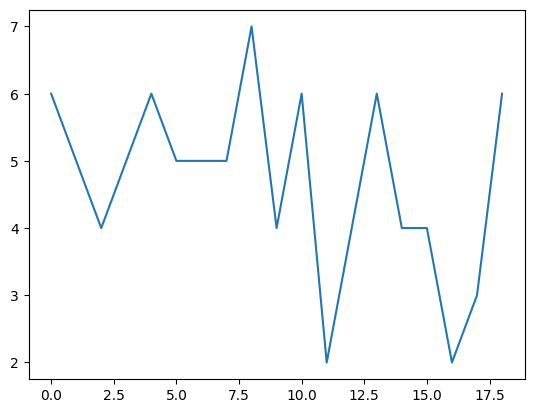

In [38]:
plt.plot(best_m)